In [1]:
import pandas as pd


def get_stratified_subset(df, label_column, num_examples_per_label, random_state=None):
    """
    Returns a stratified subset of the dataframe with a fixed number of examples for each label.

    Args:
        df (pd.DataFrame): The input dataframe.
        label_column (str): The name of the column containing the labels.
        num_examples_per_label (int): The fixed number of examples to sample for each label.
        random_state (int, optional): Random seed for reproducibility.

    Returns:
        pd.DataFrame: A stratified subset of the dataframe.
    """
    if random_state is not None:
        np.random.seed(random_state)

    stratified_subset = []

    for label in df[label_column].unique():
        label_group = df[df[label_column] == label]
        if len(label_group) < num_examples_per_label:
            raise ValueError(f"Not enough examples for label '{label}'. Requested {num_examples_per_label}, but only {len(label_group)} available.")
        
        sampled_group = label_group.sample(n=num_examples_per_label, random_state=random_state)
        stratified_subset.append(sampled_group)

    return pd.concat(stratified_subset).reset_index(drop=True)
def concatenate_dataframes(dfs):
    """
    Concatenates a list of DataFrames based on the 'filename' column as the ID.
    Drops the 'Prediction' column from each DataFrame and returns all column names except 'filename'.

    Parameters:
        dfs (list): List of pandas DataFrames to concatenate. Each must have a 'filename' column.

    Returns:
        pd.DataFrame: A single DataFrame with merged data.
        list: List of all column names excluding 'filename'.
    """
    if not dfs:
        raise ValueError("The list of DataFrames is empty.")

    for df in dfs:
        if 'Filename' not in df.columns:
            raise ValueError("Each DataFrame must contain a 'filename' column.")

    # Drop 'Prediction' column from each DataFrame if it exists
    dfs = [df.drop(columns=['Prediction'], errors='ignore') for df in dfs]

    # Start with the first DataFrame
    result = dfs[0].copy()
    
    for idx, df in enumerate(dfs[1:], start=1):
        # Rename columns to add a suffix except for 'filename'
        renamed_df = df.rename(columns={col: f"{col}_exp{idx}" for col in df.columns if col != 'Filename'})
        
        # Merge with the existing result
        result = pd.merge(result, renamed_df, on='Filename', how='outer')

    # Get all column names except 'filename'
    column_names = [col for col in result.columns if col != 'Filename']

    return result, column_names

In [2]:
import pandas as pd
import numpy as np

In [2897]:
experiments_list =[
    # 'multimodalmodel_wavlmlarge_robertalarge_lazyload_lr1e4',
    # 'multimodalmodel_w2v2robust_robertalarge_lazyload_lr1e4',
    # 'multimodalmodel_hubertxlarge_robertalarge_lazyload_lr1e4',
    # 'multimodalmodel_w2v2xls2b_robertalarge_lazyload_lr1e4',
    # 'multimodalmodel_whisperlarge_robertalarge_lazyload_lr1e4',
    # "multimodalmodel_w2v2robust_robertalarge_lazyload_lr1e4_head1",
    "multimodalmodel_hubertxlarge_robertalarge_lazyload_lr1e4_head1",
    # "multimodalmodel_w2v2xls2b_robertalarge_lazyload_lr1e4_head1",
    "multimodalmodel_whisperlarge_robertalarge_lazyload_lr1e4_1head",
    "multimodalmodel_wavlmlarge_robertalarge_lazyload_lr1e4_head1",
    "multimodalmodel_whisperlarge_debertaxxlarge_lazyload_lr1e5_lasthidden_head1",
    "multimodalmodel_whisperlarge_hubertxlarge_lazyload_lr1e4_head1",
    # "multimodalmodel_whisperlarge_robertalarge_ns3_lazyload_lr1e5_focaloss",
    "multimodalmodel_whisperlarge_robertalarge_lazyload_lr1e4_1head_prodosyembs",
    "multimodalmodel_hubertxlarge_robertalarge_lazyload_lr1e4_head1_rankingloss",
    # "multimodalmodel_w2v2xls2b_robertalarge_lazyload_lr1e4_head1_rankingloss",
    # "multimodalmodel_w2v2robust_robertalarge_lazyload_lr1e4_head1_rankingloss",
    "multimodalmodel_whisperlarge_debertaxxlarge_lazyload_lr1e5_lasthidden_head1_rankingloss",
    "multimodalmodel_whisperlarge_robertalarge_lazyload_lr1e4_1head_rankingloss",
    "multimodalmodel_wavlmlarge_robertalarge_lazyload_lr1e4_head1_softlossneutral",
    "multimodalmodel_whisperlarge_hubertxlarge_lazyload_lr1e4_head1_rankingloss",
    "multimodalmodel_whisperlarge_robertalarge_lazyload_lr1e4_1head_prodosyembs_rankingloss"
]

dfs = []
dfs_val = []
for exp in experiments_list:
    dfs.append(pd.read_csv(f'../experiments/{exp}/results/train.csv'))
    dfs_val.append(pd.read_csv(f'../experiments/{exp}/results/dev.csv'))
# preds.head()

In [2898]:
preds, cols = concatenate_dataframes(dfs)
preds_val, _ = concatenate_dataframes(dfs_val)

In [2899]:
preds.head()

,Filename,class_0_prob,class_1_prob,class_2_prob,class_3_prob,class_4_prob,class_5_prob,class_6_prob,class_7_prob,class_0_prob_exp1,...,class_6_prob_exp10,class_7_prob_exp10,class_0_prob_exp11,class_1_prob_exp11,class_2_prob_exp11,class_3_prob_exp11,class_4_prob_exp11,class_5_prob_exp11,class_6_prob_exp11,class_7_prob_exp11
0,MSP-PODCAST_0003_0126.wav,-1.4778,0.0072,-2.0437,-1.0448,-0.8017,1.9434,1.8167,0.4819,-1.7075,...,1.7705,2.2998,-1.9165,1.9867,-1.8567,-1.3196,-2.1378,1.1639,1.4546,1.7732
1,MSP-PODCAST_0003_0129.wav,-2.5707,-0.7032,-0.3989,0.5493,0.0279,0.2155,0.3474,2.0000,-3.7439,...,0.4668,2.4885,-2.5076,1.0149,0.8641,0.9063,-1.0641,-1.3063,-0.7272,3.0251
2,MSP-PODCAST_0003_0283.wav,0.6876,-0.7270,-2.3672,-0.8801,-2.0673,2.1210,2.3877,0.2139,1.0979,...,1.8361,0.3757,0.9986,-1.8184,-2.4329,-0.9919,-1.0731,2.3439,1.8298,-0.2505
3,MSP-PODCAST_0003_0398.wav,-0.5895,-1.0725,-1.6910,-0.0523,-0.7390,1.6207,1.5453,-0.3019,-0.7290,...,1.4236,0.8751,0.1991,-1.1304,-2.4288,0.1222,-0.6725,2.6246,2.1097,-0.2199
4,MSP-PODCAST_0003_0593.wav,-0.9469,-1.7439,-0.0296,-0.7940,-0.8741,1.1541,1.9676,0.2182,-1.3801,...,2.5068,0.4212,-0.9477,-1.0442,1.3873,0.1836,-0.9326,0.3390,1.8802,0.1368


In [2900]:
classes_ = ['A', 'S', 'H', 'U', 'F', 'D', 'C', 'N']

map_idx = dict()
for i, c in enumerate(classes_):
    map_idx[c] = i

map_argmax = dict()
for i, c in enumerate(classes_):
    map_argmax[i] = c

In [2901]:
df = pd.read_csv('/workspace/lucas.ueda/interspeech_ser/data/Labels/labels_consensus.csv')
df.head()

,FileName,EmoClass,EmoAct,EmoVal,EmoDom,SpkrID,Gender,Split_Set
0,MSP-PODCAST_0002_0033.wav,N,4.8,4.2,5.4,127,Female,Development
1,MSP-PODCAST_0002_0039.wav,N,4.0,4.2,4.2,127,Female,Development
2,MSP-PODCAST_0002_0051.wav,N,4.0,4.2,4.2,127,Female,Development
3,MSP-PODCAST_0002_0059.wav,X,4.0,3.8,4.0,128,Female,Development
4,MSP-PODCAST_0002_0061.wav,F,3.4,2.8,4.2,128,Female,Development


In [2902]:
# Just saving the auxiliardataset

In [2903]:
preds['FileName'] = preds['Filename']
preds = preds.merge(df[['FileName','EmoClass','Gender','SpkrID']], how='left', on = 'FileName')

preds_val['FileName'] = preds_val['Filename']
preds_val = preds_val.merge(df[['FileName','EmoClass','Gender','SpkrID']], how='left', on = 'FileName')

In [2904]:
preds['target'] = preds['EmoClass'].map(map_idx)
preds_val['target'] = preds_val['EmoClass'].map(map_idx)

In [2905]:
preds.head()

,Filename,class_0_prob,class_1_prob,class_2_prob,class_3_prob,class_4_prob,class_5_prob,class_6_prob,class_7_prob,class_0_prob_exp1,...,class_3_prob_exp11,class_4_prob_exp11,class_5_prob_exp11,class_6_prob_exp11,class_7_prob_exp11,FileName,EmoClass,Gender,SpkrID,target
0,MSP-PODCAST_0003_0126.wav,-1.4778,0.0072,-2.0437,-1.0448,-0.8017,1.9434,1.8167,0.4819,-1.7075,...,-1.3196,-2.1378,1.1639,1.4546,1.7732,MSP-PODCAST_0003_0126.wav,D,Male,3,5
1,MSP-PODCAST_0003_0129.wav,-2.5707,-0.7032,-0.3989,0.5493,0.0279,0.2155,0.3474,2.0000,-3.7439,...,0.9063,-1.0641,-1.3063,-0.7272,3.0251,MSP-PODCAST_0003_0129.wav,N,Male,3,7
2,MSP-PODCAST_0003_0283.wav,0.6876,-0.7270,-2.3672,-0.8801,-2.0673,2.1210,2.3877,0.2139,1.0979,...,-0.9919,-1.0731,2.3439,1.8298,-0.2505,MSP-PODCAST_0003_0283.wav,D,Male,3,5
3,MSP-PODCAST_0003_0398.wav,-0.5895,-1.0725,-1.6910,-0.0523,-0.7390,1.6207,1.5453,-0.3019,-0.7290,...,0.1222,-0.6725,2.6246,2.1097,-0.2199,MSP-PODCAST_0003_0398.wav,F,Male,3,4
4,MSP-PODCAST_0003_0593.wav,-0.9469,-1.7439,-0.0296,-0.7940,-0.8741,1.1541,1.9676,0.2182,-1.3801,...,0.1836,-0.9326,0.3390,1.8802,0.1368,MSP-PODCAST_0003_0593.wav,C,Male,3,6


In [2906]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [2907]:
preds.shape

(8960, 102)

In [2908]:
# preds_estrat = get_stratified_subset(preds, 'EmoClass', 300, random_state=42)
preds_estrat = preds

In [2909]:
# preds_estrat

In [2910]:
# # Just saving the auxiliardataset
# filenames = preds_estrat.FileName

# tmp = pd.read_csv("../benchmark/processed_labels.csv")

In [2911]:
# tmp = tmp[tmp['FileName'].isin(filenames)].reset_index(drop=True)
# tmp.shape

In [2912]:
# tmp.to_csv("train_stacking_sample.csv")

In [2913]:
# tmp.head()

In [2914]:
preds_estrat.EmoClass.value_counts()

EmoClass
D    1120
N    1120
F    1120
C    1120
U    1120
H    1120
A    1120
S    1120
Name: count, dtype: int64

In [2915]:
preds_estrat.Gender.value_counts()

Gender
Male      5174
Female    3786
Name: count, dtype: int64

In [2916]:
preds_estrat.isna().sum().values


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [2917]:
from xgboost import XGBClassifier, callback

In [3099]:
from sklearn.model_selection import KFold, StratifiedKFold
def train_kfold(df, feature_names, target_name, random_state=42, k=5):
    # Set random seed for reproducibility
    np.random.seed(random_state)
    
    # Prepare features and target
    X = df[feature_names].values
    y = df[target_name].values

    skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=random_state)
    
    trained_models = []
    for train_index, _ in skf.split(X,y):
        # Split data
        X_train = X[train_index]
        y_train = y[train_index]
        
        # Train SVM
        # svm = SVC(random_state = 42, C = 0.7, kernel='rbf', gamma = 'scale', probability=True)
        svm = RandomForestClassifier(random_state = 42, n_estimators = 200, max_depth = 8, criterion="gini", min_samples_leaf=10, min_samples_split=10)
    
        # svm = RandomForestClassifier(random_state = 42, 
        #                              n_estimators = 1000, 
        #                              max_depth = 8, 
        #                              criterion="gini", 
        #                              min_samples_leaf=10, 
        #                              min_samples_split=10, 
        #                              max_features = 0.07)
        
        svm.fit(X_train, y_train)
        
        trained_models.append(svm)
    
    return trained_models

def predict_with_ensemble(val_df, feature_names, target_name, trained_models, idx = 0):
    # Prepare features
    X_val = val_df[feature_names].values
    
    # Aggregate predictions
    predictions = []
    for i, model in enumerate(trained_models):
        # Predic
        if i == idx:
            fold_pred = model.predict_proba(X_val)
            predictions.append(fold_pred)
    
    # Average probabilities
    avg_probabilities = np.mean(predictions, axis=0)
    
    # Return argmax of averaged probabilities
    return np.argmax(avg_probabilities, axis=1)

In [3076]:
# lr = LogisticRegression(random_state = 42, max_iter = 500, C=1,  multi_class='ovr', penalty='l2')
lr = RandomForestClassifier(random_state = 42, n_estimators = 500, max_depth = 8, criterion="gini", min_samples_leaf=10, min_samples_split=10)
# lr = RandomForestClassifier(random_state = 42, n_estimators = 500, max_depth = 8, criterion="gini", min_samples_leaf=10, min_samples_split=10, max_samples=0.7)

# xgb_params = {
#     "objective": "multi:softmax",  # Use 'multi:softprob' for probabilities instead of classes
#     "num_class": 8,               # Number of classes
#     "eval_metric": "mlogloss",    # Evaluation metric
#     "learning_rate": 0.01,         # Lower value to reduce overfitting (0.05-0.1 is common)
#     "max_depth": 8,               # Depth of trees; lower to prevent overfitting
#     "min_child_weight": 3,        # Minimum sum of instance weight (hessian) in a leaf
#     "gamma": 0.2,                 # Minimum loss reduction to make a split; combats overfitting
#     "subsample": 1.0,             # Subsample ratio of training instances (80% of rows)
#     "colsample_bytree": 0.5,      # Subsample ratio of columns for each tree (80% of columns)
#     "lambda": 1.0,                # L2 regularization term
#     "alpha": 0.1,                 # L1 regularization term
#     "scale_pos_weight": 1,        # For imbalanced classes; adjust if needed
#     "n_estimators": 100,          # Total number of trees; use early stopping for optimization
#     "random_state": 42,           # Seed for reproducibility
#     "tree_method": "hist",        # Faster training for large datasets
#     "predictor": "gpu_predictor", # Use GPU if available for better performance
#     "early_stopping_rounds":15
# }

# Define early stopping callback
# early_stopping = callback.EarlyStopping(
    # rounds=5,                      # Stop if no improvement after 50 rounds
    # save_best=True,                 # Save the best model
# )

# lr = XGBClassifier(**xgb_params)
# lr = SVC(random_state = 42, C = 0.7, kernel='rbf', gamma = 'scale', probability=True)

# preds_estrat = get_stratified_subset(preds, 'EmoClass', 300, random_state=42)

# lr.fit(preds_estrat[cols], preds_estrat['target'])
# lr.fit(preds_estrat[cols],
    # preds_estrat['target'],
    # eval_set=[(preds_estrat[cols], preds_estrat['target']), (preds_val[cols], preds_val["target"])],
    # verbose=10)

models =  train_kfold(preds_estrat, cols, 'target', random_state=42, k=5)

In [3077]:
# x = predict_with_ensemble(preds_val, cols, "target", models)

In [3078]:
# x

In [3153]:
preds_val['Prediction'] = predict_with_ensemble(preds_val, cols, "target", models, idx = 4)
preds_val['Prediction'] = preds_val['Prediction'].map(map_argmax) 

preds_estrat['Prediction'] = predict_with_ensemble(preds_estrat, cols, "target", models, idx =4)
preds_estrat['Prediction'] = preds_estrat['Prediction'].map(map_argmax) 

# preds_val['Prediction'] = lr.predict(preds_val[cols])
# preds_val['Prediction'] = preds_val['Prediction'].map(map_argmax) 

# preds_estrat['Prediction'] = lr.predict(preds_estrat[cols])
# preds_estrat['Prediction'] = preds_estrat['Prediction'].map(map_argmax) 

In [3154]:
preds_val.head()

,Filename,class_0_prob,class_1_prob,class_2_prob,class_3_prob,class_4_prob,class_5_prob,class_6_prob,class_7_prob,class_0_prob_exp1,...,class_4_prob_exp11,class_5_prob_exp11,class_6_prob_exp11,class_7_prob_exp11,FileName,EmoClass,Gender,SpkrID,target,Prediction
0,MSP-PODCAST_0002_0033.wav,-1.5255,-0.9042,-0.6863,1.0975,1.5944,-0.9076,-0.0396,0.5794,-0.5298,...,0.1076,0.2568,0.2409,0.6177,MSP-PODCAST_0002_0033.wav,N,Female,127,7,F
1,MSP-PODCAST_0002_0039.wav,-1.1414,-0.4389,0.4976,0.2762,0.5475,-1.1234,-0.7050,0.6852,-0.4826,...,0.6337,-0.3545,0.0928,0.8891,MSP-PODCAST_0002_0039.wav,N,Female,127,7,N
2,MSP-PODCAST_0002_0051.wav,-0.6628,-0.8917,0.3540,0.2094,0.4543,0.0595,-0.3424,0.4155,-1.0789,...,-0.4951,0.2014,0.7075,1.4479,MSP-PODCAST_0002_0051.wav,N,Female,127,7,N
3,MSP-PODCAST_0002_0061.wav,-1.1753,-0.5957,-0.2784,0.1372,0.4138,-0.4262,0.3996,0.2329,-1.5239,...,0.0896,0.1752,1.0439,0.6118,MSP-PODCAST_0002_0061.wav,F,Female,128,4,C
4,MSP-PODCAST_0006_0017.wav,-1.9912,0.3821,-0.1018,-0.1456,0.8424,-0.6897,0.0197,0.7851,-2.2101,...,-0.9243,0.1276,0.5126,1.7037,MSP-PODCAST_0006_0017.wav,N,Female,127,7,N


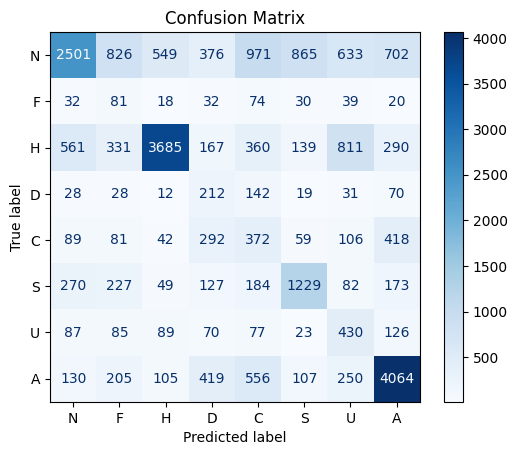

In [3155]:
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(preds_val['EmoClass'], preds_val['Prediction'], labels=preds_val['EmoClass'].unique())

# Display labels
labels = preds_val['EmoClass'].unique()

# Visualize confusion matrix
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
cmd.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [3156]:
preds_subset = get_stratified_subset(preds_val, 'EmoClass', 100)
preds_subset.head()

,Filename,class_0_prob,class_1_prob,class_2_prob,class_3_prob,class_4_prob,class_5_prob,class_6_prob,class_7_prob,class_0_prob_exp1,...,class_4_prob_exp11,class_5_prob_exp11,class_6_prob_exp11,class_7_prob_exp11,FileName,EmoClass,Gender,SpkrID,target,Prediction
0,MSP-PODCAST_2421_0197.wav,0.5336,0.3645,-2.4403,-0.4542,-0.4124,1.2771,1.0001,-1.2352,0.5945,...,-0.5616,0.5499,0.9331,-1.0239,MSP-PODCAST_2421_0197.wav,N,Female,210,7,S
1,MSP-PODCAST_2347_1004.wav,4.1935,-2.3495,-1.3108,-0.3024,-0.4416,-0.0597,0.3433,-2.2734,4.7512,...,-1.2015,1.9021,1.9905,-2.2894,MSP-PODCAST_2347_1004.wav,N,Female,210,7,A
2,MSP-PODCAST_3406_0004_0003.wav,-1.3492,-1.1070,1.1130,-0.1864,-0.1879,-1.2438,0.0610,0.8294,-0.8285,...,-0.7390,-2.4185,-1.0858,2.1934,MSP-PODCAST_3406_0004_0003.wav,N,Male,1767,7,N
3,MSP-PODCAST_0807_1720.wav,-2.1952,-2.3865,1.3040,2.3231,-1.0546,-1.7946,0.3089,0.5984,-1.4937,...,-1.2828,-0.5457,0.8967,1.0590,MSP-PODCAST_0807_1720.wav,N,Male,97,7,U
4,MSP-PODCAST_3079_1429.wav,-2.6322,0.2084,0.1194,0.6955,-0.3376,-0.5716,-0.7618,1.6250,-3.1947,...,-2.2546,-2.1688,-1.6295,3.3364,MSP-PODCAST_3079_1429.wav,N,Male,2261,7,N


# Training bootstrap

In [3157]:
# Average F1-score using bootstrap
f1_scores = []
for i in range(100):
    preds_subset = get_stratified_subset(preds_estrat, 'EmoClass', 100, i)
    f1_scores.append(f1_score(preds_estrat['EmoClass'], preds_estrat['Prediction'], average='macro'))

In [3158]:
f1_scores = np.array(f1_scores)

np.mean(f1_scores), np.std(f1_scores),np.max(f1_scores),np.min(f1_scores)

(0.651336918512519,
 1.1102230246251565e-16,
 0.6513369185125188,
 0.6513369185125188)

In [3159]:
f1_score(preds_estrat['EmoClass'], preds_estrat['Prediction'], average='macro')

0.6513369185125188

In [3160]:
accuracy_score(preds_estrat['EmoClass'], preds_estrat['Prediction'])

0.6513392857142857

# Dev bootstrap

In [3161]:
# Average F1-score using bootstrap
f1_scores = []
for i in range(100):
    preds_subset = get_stratified_subset(preds_val, 'EmoClass', 200, i)
    f1_scores.append(f1_score(preds_subset['EmoClass'], preds_subset['Prediction'], average='macro'))

In [3162]:
# f1_scores

In [3163]:
f1_scores = np.array(f1_scores)

np.mean(f1_scores), np.std(f1_scores),np.max(f1_scores),np.min(f1_scores)

(0.4292336299226378,
 0.00996323230648333,
 0.4509996583080222,
 0.4037795383095361)

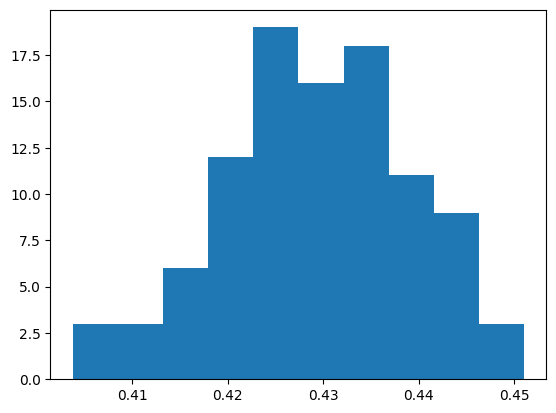

In [3164]:
plt.hist(f1_scores, bins=10)
plt.show()

In [3165]:
f1_score(preds_val['EmoClass'], preds_val['Prediction'], average='macro')

0.3785077904339177

In [3166]:
f1_score(preds_val['EmoClass'], preds_val['Prediction'], average='micro')

0.4978224720880513

In [3167]:
accuracy_score(preds_val['EmoClass'], preds_val['Prediction'])

0.4978224720880513

In [3140]:
f1_score(preds_val[preds_val['Gender']=='Female']['EmoClass'], preds_val[preds_val['Gender']=='Female']['Prediction'], average='macro')

0.35086324551524495

In [3054]:
f1_score(preds_val[preds_val['Gender']=='Male']['EmoClass'], preds_val[preds_val['Gender']=='Male']['Prediction'], average='macro')

0.3978423893949967

In [3055]:
accuracy_score(preds_val[preds_val['Gender']=='Female']['EmoClass'], preds_val[preds_val['Gender']=='Female']['Prediction'])

0.4361047635788364

In [3056]:
accuracy_score(preds_val[preds_val['Gender']=='Male']['EmoClass'], preds_val[preds_val['Gender']=='Male']['Prediction'])

/opt/conda/lib/python3.10/site-packages/IPython/core/displayhook.py:275: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


0.5498559077809798

In [3033]:
for e in preds['EmoClass'].unique():
    acc = accuracy_score(preds_val[preds_val['EmoClass']==e]['EmoClass'], preds_val[preds_val['EmoClass']==e]['Prediction'])
    print(f'Emotion {e} acc = {acc}')

Emotion D acc = 0.4151291512915129
Emotion N acc = 0.3285733530917419
Emotion F acc = 0.24846625766871167
Emotion C acc = 0.24126113776559288
Emotion U acc = 0.4275582573454914
Emotion H acc = 0.5991488020176545
Emotion A acc = 0.6958533241946538
Emotion S acc = 0.5288338316958565


In [2739]:
preds_val.EmoClass.value_counts()

EmoClass
N    7423
H    6344
A    5836
S    2341
C    1459
U     987
D     542
F     326
Name: count, dtype: int64

In [ ]:
preds_val.Prediction.value_counts(normalize=True)

In [ ]:
import joblib

# Save to a file
for i,m in enumerate(models):
    joblib.dump(m, f'../submissions/rf_model_stackingv3_{i}.pkl')